In [1]:
!uv pip install jupyterlab-vim

Using Python 3.12.9 environment at: C:\Users\RBO\repos\mbo_utilities\.venv
Audited 1 package in 13ms


In [1]:
from pathlib import Path
import zarr
import mbo_utilities as mbo
import fastplotlib as fpl

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),NVIDIA RTX A4000,DiscreteGPU,Vulkan,553.09
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
✅,NVIDIA RTX A4000,DiscreteGPU,D3D12,
❗ limited,Microsoft Basic Render Driver,CPU,D3D12,
❌,NVIDIA RTX A4000/PCIe/SSE2,Unknown,OpenGL,4.6.0 NVIDIA 553.09


In [2]:
path = Path(r"D:\W2_DATA\kbarber\07_27_2025\mk355\zarr\data_roi_merged")
zarr_files = list(path.glob("*.zarr*"))
zarr_files

[WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane01.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane02.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane03.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane04.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane05.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane06.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane07.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane08.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane09.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane10.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025/mk355/zarr/data_roi_merged/plane11.zarr'),
 WindowsPath('D:/W2_DATA/kbarber/07_27_2025

In [5]:
from mbo_utilities.lazy_array import ZarrArray
roi_arr = ZarrArray(
    zarr_files
)
roi_arr.shape

(1574, 14, 647, 450)

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
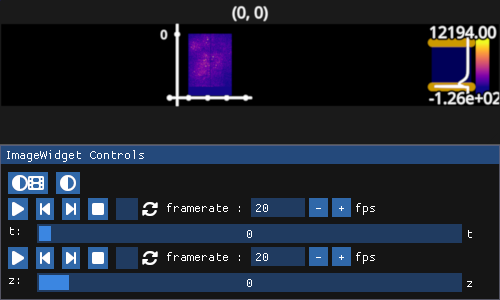

In [7]:
fpl.ImageWidget(roi_arr).show()

In [16]:
path = Path(r"D:\W2_DATA\kbarber\07_27_2025\mk355\zarr\data_roi")
zarr_files = list(path.glob("*.zarr*"))

array = ZarrArray(
    zarr_files
)

In [19]:
import tifffile
summary = np.load(Path(array.metadata["summary"]).joinpath("summary.npy"), allow_pickle=True).item()
ref_img = summary["ref_img_3d"]
tifffile.imwrite(r"D:\W2_DATA\kbarber\07_27_2025\mk355\zarr\ref_img.tiff", ref_img)
# fpl.ImageWidget(summary["ref_img_3d"]).show()

In [23]:
init_mov = np.load(summary["init_mov_path"], allow_pickle=True)
init_mov.shape

mean_z = np.mean(init_mov, axis=1)

In [24]:
mean_z.shape

(14, 647, 453)

In [27]:
tifffile.imwrite(r"D:\W2_DATA\kbarber\07_27_2025\mk355\zarr\raw_img.tiff", summary['raw_img'])

In [20]:
list(summary.keys())

['ref_img_3d',
 'raw_img',
 'img',
 'crosstalk_coeff',
 'crosstalk_planes',
 'crosstalk_info',
 'plane_shifts',
 'refs_and_masks',
 'reference_params',
 'reference_info',
 'min_pix_vals',
 'fuse_shifts',
 'fuse_shift',
 'fuse_ccs',
 'tiffile_xs',
 'xpad',
 'ypad',
 'new_xs',
 'og_xs',
 'init_mov_path',
 'init_tifs']

In [5]:
fpath1 = Path(r"D:\W2_DATA\kbarber\07_27_2025\mk355\raw\anatomical_3_roi")
roi1_files = [x for x in fpath1.glob("*roi1*")]
roi2_files = [x for x in fpath1.glob("*roi2*")]
len(roi1_files), len(roi2_files)

(14, 14)

In [8]:
import lbm_suite2p_python as lsp

ops1 = Path(roi1_files[0]) / "ops.npy"
roi1 = lsp.load_ops(ops1)

list(roi1.keys())

['suite2p_version',
 'look_one_level_down',
 'fast_disk',
 'delete_bin',
 'mesoscan',
 'bruker',
 'bruker_bidirectional',
 'h5py',
 'h5py_key',
 'nwb_file',
 'nwb_driver',
 'nwb_series',
 'save_path0',
 'save_folder',
 'subfolders',
 'move_bin',
 'nplanes',
 'nchannels',
 'functional_chan',
 'tau',
 'fs',
 'force_sktiff',
 'frames_include',
 'multiplane_parallel',
 'ignore_flyback',
 'preclassify',
 'save_mat',
 'save_NWB',
 'combined',
 'aspect',
 'do_bidiphase',
 'bidiphase',
 'bidi_corrected',
 'do_registration',
 'two_step_registration',
 'keep_movie_raw',
 'nimg_init',
 'batch_size',
 'maxregshift',
 'align_by_chan',
 'reg_tif',
 'reg_tif_chan2',
 'subpixel',
 'smooth_sigma_time',
 'smooth_sigma',
 'th_badframes',
 'norm_frames',
 'force_refImg',
 'pad_fft',
 'nonrigid',
 'block_size',
 'snr_thresh',
 'maxregshiftNR',
 '1Preg',
 'spatial_hp_reg',
 'pre_smooth',
 'spatial_taper',
 'roidetect',
 'spikedetect',
 'sparse_mode',
 'spatial_scale',
 'connected',
 'nbinned',
 'max_iterati